## Predicting diabetes with Python

In [2]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('archive/diabetes.csv')

# Show the first five rows of data
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Dataset Summary')
print(data.describe())

Dataset Summary
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000  

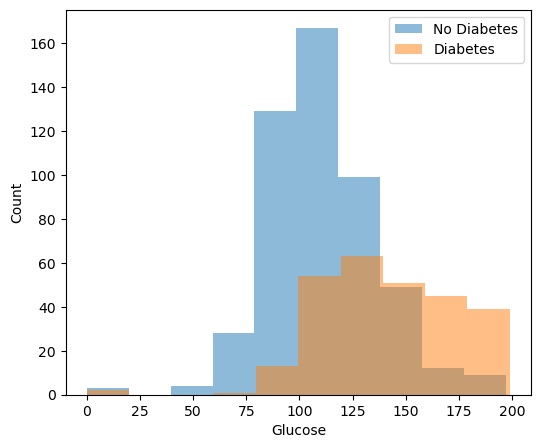

In [5]:
# Histogram of Glucose by Diabetes results
plt.figure(figsize=(6,5))
plt.hist(data[data['Outcome']==0]['Glucose'], alpha=0.5, label='No Diabetes')
plt.hist(data[data['Outcome']==1]['Glucose'], alpha=0.5, label='Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

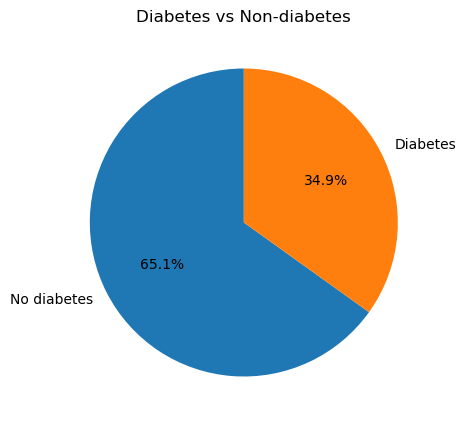

In [8]:
# Pie chart of diabetes distribution
labels = ['No diabetes', 'Diabetes']
sizes = data['Outcome'].value_counts().sort_index()
plt.figure(figsize=(6,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes vs Non-diabetes')
plt.show()

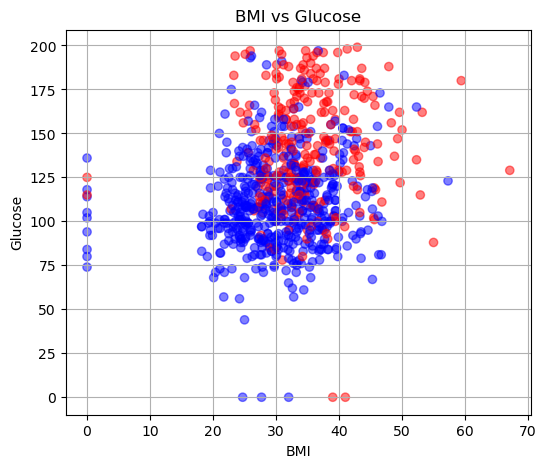

In [10]:
# Scatter plot of BMI vs Glucose
plt.figure(figsize=(6,5))
color = data['Outcome'].map({0: 'blue', 1: 'red'})
plt.scatter(data['BMI'], data['Glucose'], c = color, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose')
plt.grid(True)
plt.show()

In [11]:
# Create a features and target dataset
X = data.drop('Outcome', axis=1).copy()
y = data['Outcome'].copy()

In [12]:
# Split the data into a training dataset and a testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the models predictions or classifications
y_pred = model.predict(X_test)

# Evaluating our model
print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=labels))

Prediction Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

 No diabetes       0.79      0.78      0.78        99
    Diabetes       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

